<a href="https://colab.research.google.com/github/DamodaraBarbosa/DamodaraBarbosa/blob/main/06_governador_analysis_eleicoes_ceara_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas geobr descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geobr import read_municipality
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
# Para ignorar qualquer aviso:

import warnings

warnings.filterwarnings("ignore")

# 1. Carregando os dados no *dataframe*

In [4]:
votacao_ce = pd.read_csv(
    '/content/drive/MyDrive/Datasets/votacao_secao_2022_CE_tratado.csv',
    sep= ',', encoding= 'latin-1'
)

In [5]:
votacao_ce.head(3)

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos
0,FORTALEZA,94,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4
1,RUSSAS,9,266,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,13
2,PARAIPABA,109,119,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,3


# 2. Informações do *dataframe*

## 2.1 Dimensões do *dataframe*

Definir as dimensões de um *dataframe* é indicar o número de colunas e linhas do mesmo. 

In [6]:
f'O dataframe contém {votacao_ce.shape[1]} colunas e {votacao_ce.shape[0]} linhas.'

'O dataframe contém 7 colunas e 2509903 linhas.'

## 2.2 Infos do *dataframe*

In [7]:
votacao_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509903 entries, 0 to 2509902
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   nm_municipio  object
 1   nr_zona       int64 
 2   nr_secao      int64 
 3   ds_cargo      object
 4   nr_votavel    int64 
 5   nm_votavel    object
 6   qt_votos      int64 
dtypes: int64(4), object(3)
memory usage: 134.0+ MB


## 2.3 Dados faltantes

É importante identificar a presença de dados faltantes ("not a number" ou `NaN`).

In [8]:
votacao_ce.isna().sum()

nm_municipio    0
nr_zona         0
nr_secao        0
ds_cargo        0
nr_votavel      0
nm_votavel      0
qt_votos        0
dtype: int64

Não há em nenhuma das colunas do conjunto de dados a presença de dados faltantes.

## 2.4 Presença de dados duplicados

Para integridade dos dados também é importante detectar se há dados duplicados. Para isso:

In [9]:
votacao_ce.loc[votacao_ce.duplicated()]

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos


Não há dados duplicados no conjunto de dados.

# 3. Tratamento dos dados

Os dados referentes às zonas e seções eleitorais apesar serem informações numéricas, são valores categóricos. Portanto, é possível converter esses dados para *string*.

In [10]:
# Usa-se a função astype para converter os dados das duas colunas para string:

votacao_ce['nr_zona'] = votacao_ce['nr_zona'].astype(str)
votacao_ce['nr_secao'] = votacao_ce['nr_secao'].astype(str)

In [11]:
votacao_ce.dtypes

nm_municipio    object
nr_zona         object
nr_secao        object
ds_cargo        object
nr_votavel       int64
nm_votavel      object
qt_votos         int64
dtype: object

In [12]:
votacao_ce.to_csv('votacao_ce_tratado.csv', index= False, encoding= 'latin-1')

# 4. Análise eleitoral

## 4.1 Candidatos

In [13]:
# Buscam-se apenas os dados referentes ao cargo de governador:

governador = votacao_ce.query('ds_cargo == "GOVERNADOR"')
governador.head()

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos
16323,IGUATU,13,33,GOVERNADOR,80,SERLEY DE SOUSA LEAL,1
16324,CASCAVEL,7,237,GOVERNADOR,80,SERLEY DE SOUSA LEAL,2
16325,BARROQUINHA,108,52,GOVERNADOR,80,SERLEY DE SOUSA LEAL,1
16326,MARANGUAPE,4,44,GOVERNADOR,80,SERLEY DE SOUSA LEAL,1
16327,MARACANAÚ,122,36,GOVERNADOR,80,SERLEY DE SOUSA LEAL,1


Ao buscar os dados únicos na coluna nm_votavel observa-se que:



In [14]:
governador['nm_votavel'].unique()

array(['SERLEY DE SOUSA LEAL', 'ROBERTO CLÁUDIO RODRIGUES BEZERRA',
       'ELMANO DE FREITAS DA COSTA', 'JOSÉ BATISTA NETO',
       'WAGNER SOUSA GOMES', 'FRANCISCO RAIMUNDO MALTA DE ARAÚJO',
       'VOTO BRANCO', 'VOTO NULO'], dtype=object)

* Excetuando-se votos em branco e nulos, os candidados são: Serley de Sousa Leal, Roberto Cláudio Rodrigues Bezerra, Elmano de Freitas da Costa, José Batista Neto, Wagner Sousa Gomes e Francisco Raimundo Malta de Araújo.

## 4.2 Votos por candidato

In [15]:
# Os votos por governador são determinados e o dataframe é ordenado decrescentemente:

votos_por_governador = governador.groupby('nm_votavel')['qt_votos'].sum().to_frame().sort_values('qt_votos', ascending= False)
votos_por_governador

,qt_votos
nm_votavel,
ELMANO DE FREITAS DA COSTA,2808300
WAGNER SOUSA GOMES,1649213
ROBERTO CLÁUDIO RODRIGUES BEZERRA,734976
VOTO NULO,249099
VOTO BRANCO,175459
FRANCISCO RAIMUNDO MALTA DE ARAÚJO,3015
SERLEY DE SOUSA LEAL,1881
JOSÉ BATISTA NETO,1507


In [16]:
fig = px.bar(
    data_frame= votos_por_governador,
    y= votos_por_governador.index,
    x= 'qt_votos',
    color= votos_por_governador.index,
    text= 'qt_votos',
    title= 'Votos por candidato ao cargo de governador do Ceará',
)
fig.update_xaxes(range= [0, 3.5e6])
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Candidatos', xaxis_title= 'Quantidade de votos', legend_title= 'Candidatos', showlegend= False)
fig.update_traces(textfont_size= 12, textangle= 0, textposition= 'outside')
fig.show()

## 4.3 Porcentagem de votos totais e válidos ao governo do estado

In [17]:
# Excetuam-se os votos brancos e nulos:

votos_validos = governador.query('nm_votavel != ["VOTO NULO", "VOTO BRANCO"]')

# Calcula-se apenas os votos válidos:

total_votos_validos = votos_validos['qt_votos'].sum()
print(f'Votos válidos: {total_votos_validos}')

# Votos totais incluindo brancos e nulos:

total_votos = governador['qt_votos'].sum()
print(f'Votos totais: {total_votos}')

Votos válidos: 5198892
Votos totais: 5623450


Verifica-se que nem VOTO BRANCO, nem VOTO NULO estão mais presentes no conjunto de dados.

In [18]:
votos_validos['nm_votavel'].unique()

array(['SERLEY DE SOUSA LEAL', 'ROBERTO CLÁUDIO RODRIGUES BEZERRA',
       'ELMANO DE FREITAS DA COSTA', 'JOSÉ BATISTA NETO',
       'WAGNER SOUSA GOMES', 'FRANCISCO RAIMUNDO MALTA DE ARAÚJO'],
      dtype=object)

Um *dataframe* contendo as informações sobre porcentagens dos votos é instanciado:

In [19]:
governador.groupby('nm_votavel')['qt_votos'].sum().sort_values(ascending= True).transpose()

nm_votavel
JOSÉ BATISTA NETO                        1507
SERLEY DE SOUSA LEAL                     1881
FRANCISCO RAIMUNDO MALTA DE ARAÚJO       3015
VOTO BRANCO                            175459
VOTO NULO                              249099
ROBERTO CLÁUDIO RODRIGUES BEZERRA      734976
WAGNER SOUSA GOMES                    1649213
ELMANO DE FREITAS DA COSTA            2808300
Name: qt_votos, dtype: int64

In [20]:
# Instancia-se um dataframe contendo a porcentagem de votos totais e votos válidos por candidato ao senado:

porcentagem_votos_governador = pd.DataFrame(
    {'Votos totais': round((governador.groupby('nm_votavel')['qt_votos'].sum()/total_votos) * 100, 2), # cálculo da porcentagem de votos totais.
     'Votos válidos': round((votos_validos.groupby('nm_votavel')['qt_votos'].sum()/total_votos_validos) * 100, 2)} # cálculo da porcentagem de votos válidos.
).sort_values(['Votos totais', 'Votos válidos'], ascending= [False, False]) # os dados são ordenados em ordem decrescente.

# Utiliza-se o método transpose para inverter index em colunas e vice-versa:

porcentagem_votos_governador = porcentagem_votos_governador.transpose()

porcentagem_votos_governador

nm_votavel,ELMANO DE FREITAS DA COSTA,WAGNER SOUSA GOMES,ROBERTO CLÁUDIO RODRIGUES BEZERRA,VOTO NULO,VOTO BRANCO,FRANCISCO RAIMUNDO MALTA DE ARAÚJO,SERLEY DE SOUSA LEAL,JOSÉ BATISTA NETO
Votos totais,49.94,29.33,13.07,4.43,3.12,0.05,0.03,0.03
Votos válidos,54.02,31.72,14.14,NaN,NaN,0.06,0.04,0.03


In [21]:
fig = px.bar(
    data_frame= porcentagem_votos_governador,
    y= porcentagem_votos_governador.index,
    x= porcentagem_votos_governador.columns,
    title= 'Porcentagem de votos totais e válidos para o cargo de governador do Ceará'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos', yaxis= dict(autorange= 'reversed'))
fig.show()

## 4.4 Votos por município cearense

### 4.2.1 Quantidade de municípios em que os candidatos venceram 

In [22]:
# Os votos são agrupados por município e candidato e depois somados:

votos_candidatos_por_municipio = governador.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum()

# Os index são transformados em uma coluna:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.reset_index()

# Os valores do dataframe são ordenados em ordem alfabética para os municípios e ordem decrescente dos votos:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

# No fim, deseja-se apenas o candidato mais votado no município:

vencedores_por_municipio = votos_candidatos_por_municipio.groupby('nm_municipio').head(1)
vencedores_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos
0,ABAIARA,ELMANO DE FREITAS DA COSTA,4182
8,ACARAPE,ELMANO DE FREITAS DA COSTA,4652
15,ACARAÚ,ELMANO DE FREITAS DA COSTA,20534
23,ACOPIARA,ELMANO DE FREITAS DA COSTA,18015
31,AIUABA,ELMANO DE FREITAS DA COSTA,4052


A variável `municipios_vencidos_por_candidato` é instanciada utilizando o método value_counts. O uso do método ocorre a fim de contar quantas vezes o nome de cada candidato aparece no *dataframe* `vencedores_por_municipio`.

In [23]:
municipios_vencidos_por_candidato = vencedores_por_municipio.value_counts('nm_votavel')
municipios_vencidos_por_candidato

nm_votavel
ELMANO DE FREITAS DA COSTA           178
WAGNER SOUSA GOMES                     5
ROBERTO CLÁUDIO RODRIGUES BEZERRA      1
dtype: int64

In [24]:
fig = px.bar(
    y= municipios_vencidos_por_candidato.keys(),
    x= municipios_vencidos_por_candidato.values,
    color= municipios_vencidos_por_candidato.keys(),
    text= municipios_vencidos_por_candidato.values,
    title= 'Quantidade de municípios cearenses em que cada candidato saiu vencedor'
)
fig.update_traces(textfont_size= 12, textposition= 'outside', textangle= 0)
fig.update_layout(
    title= {'x': 0.5}, yaxis_title= 'Candidatos', yaxis= dict(autorange= 'reversed'),
    xaxis_title= 'Número de cidades', legend_title= 'Candidatos'
)
fig.show()

* O candidato Elmano de Freitas saiu vencedor em 178 cidades cearenses. Enquanto os candidatos Wagner Gomes e Roberto Claúdio só saíram vencedores em 5 e 3 cidades, respectivamente.

### 4.2.2 Cidades em que o candidato Wagner Sousa Gomes venceu

In [25]:
vencedores_por_municipio.query('nm_votavel == "WAGNER SOUSA GOMES"')

,nm_municipio,nm_votavel,qt_votos
431,EUSÉBIO,WAGNER SOUSA GOMES,18787
455,FORTALEZA,WAGNER SOUSA GOMES,602050
820,MARCO,WAGNER SOUSA GOMES,8170
920,MORRINHOS,WAGNER SOUSA GOMES,6503
1274,SÃO GONÇALO DO AMARANTE,WAGNER SOUSA GOMES,16630


### 4.2.3 Cidades em que o candidato Roberto Claúdio venceu

In [26]:
vencedores_por_municipio.query('nm_votavel == "ROBERTO CLÁUDIO RODRIGUES BEZERRA"')

,nm_municipio,nm_votavel,qt_votos
1096,PIRES FERREIRA,ROBERTO CLÁUDIO RODRIGUES BEZERRA,2644


### 4.2.4 Visualização no mapa do estado

A biblioteca `geobr` é utilizada ppara obter os dados geoespaciais dos municípios cearenses. Instanciam-se os dados na variável `ceara_gpd`:

In [27]:
# A função read_municipality retorna um dataframe do geopandas com os dados geoespaciais, aqui com dados dos municípios cearenses:

ceara_gpd = read_municipality(code_muni= 23, year= 2020)

# Já como forma de preparação para o 'merge' com os dados da eleição, alguns tratamentos são feitos:

ceara_gpd['name_muni'] = ceara_gpd['name_muni'].str.upper() # os nomes dos municípios são postos todos em caixa alta.
ceara_gpd['code_muni'] = ceara_gpd['code_muni'].astype(int) # os códigos IBGE dos municípios são convertidos para int.

ceara_gpd.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,2300101,ABAIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ..."
1,2300150,ACARAPE,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ..."
2,2300200,ACARAÚ,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ..."
3,2300309,ACOPIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ..."
4,2300408,AIUABA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ..."


In [28]:
# É feita a união dos dados geoespaciais e os dados referentes aos candidatos vencedores em cada município:

vencedores_por_municipio = pd.merge(
    left= ceara_gpd[['code_muni', 'name_muni', 'geometry']], right= vencedores_por_municipio, 
    how= 'inner', left_on= 'name_muni', right_on= 'nm_municipio'
)

# A coluna name_muni é redundante, por isso é eliminada do dataframe:

vencedores_por_municipio = vencedores_por_municipio.drop('name_muni', axis= 1) 
vencedores_por_municipio.head()

,code_muni,geometry,nm_municipio,nm_votavel,qt_votos
0,2300101,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",ABAIARA,ELMANO DE FREITAS DA COSTA,4182
1,2300150,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ...",ACARAPE,ELMANO DE FREITAS DA COSTA,4652
2,2300200,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ...",ACARAÚ,ELMANO DE FREITAS DA COSTA,20534
3,2300309,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ...",ACOPIARA,ELMANO DE FREITAS DA COSTA,18015
4,2300408,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ...",AIUABA,ELMANO DE FREITAS DA COSTA,4052


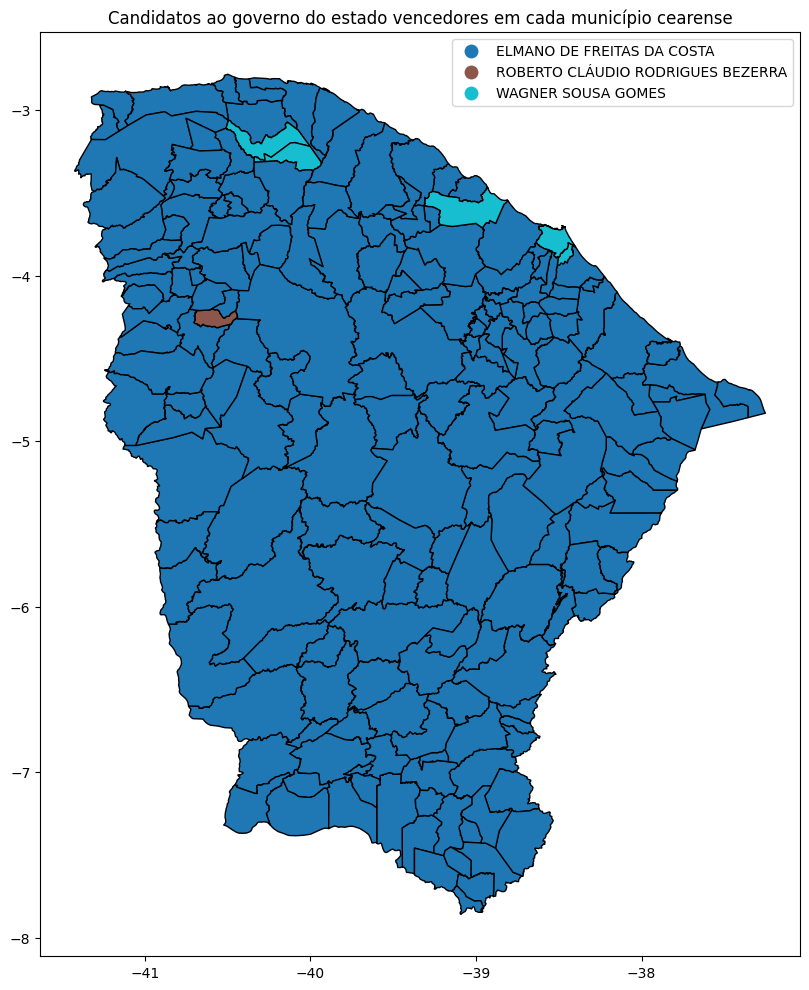

In [29]:
ax = vencedores_por_municipio.plot(
    column= 'nm_votavel', edgecolor= 'black',
    legend= True, figsize= (18, 12)
)
ax.set_title('Candidatos ao governo do estado vencedores em cada município cearense')
plt.show()

* O mapa mostra o grande desempenho do candidato Elmano de Freitas, que apesar da vitória de Wagner Sousa em municípios importantes (Fortaleza, Eusério e São Gonçalo do Amarante), recebeu mais votos na maior parte das cidades cearenses.

## 4.5 Votos para governador nos municípios da Região Metropolitana de Fortaleza 

A Região Metropolitana de Fortaleza é constituída de 19 municípios sendo eles:

* Aquiraz, Cascavel, Caucaia, Chorozinho, Eusébio, Fortaleza, Guaiúba, Horizonte, Itaitinga, Maracanaú, Maranguape, Pacajus, Pacatuba, Pindoretama, São Gonçalo do Amarante, São Luís do Curu, Paraipaba, Paracuru e Trairi. 

Fonte: https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Fortaleza



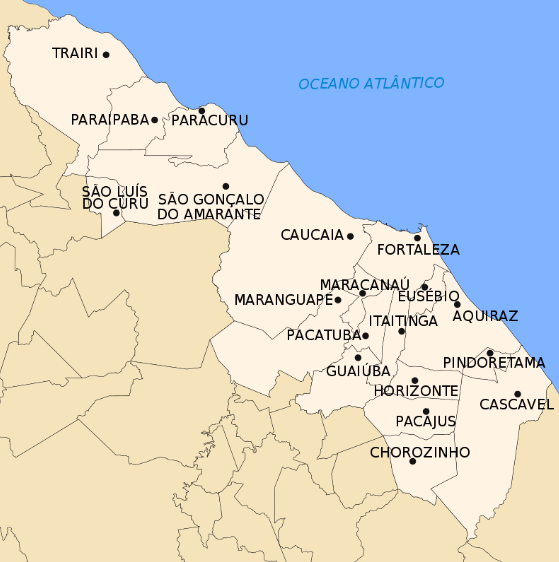

Instancia-se uma lista contendo o nome dos municípios da região metropolitana, todos eles em caixa alta:

In [30]:
regiao_metropolitana = [
    'AQUIRAZ', 'CASCAVEL', 'CAUCAIA', 'CHOROZINHO', 'EUSÉBIO', 
    'FORTALEZA', 'GUAIÚBA', 'HORIZONTE', 'ITAITINGA', 'MARACANAÚ', 
    'MARANGUAPE', 'PACAJUS', 'PACATUBA', 'PINDORETAMA', 
    'SÃO GONÇALO DO AMARANTE', 'SÃO LUÍS DO CURU',
    'PARAIPABA', 'PARACURU', 'TRAIRI'
]

### 4.5.1 Desempenho eleitoral de cada candidato por município da Região Metropolitana de Fortaleza

Determina-se a quantidade de votos totais para governador em cada cidade da região metropolitana.

In [31]:
# Buscam-se os dados referentes a votação para governador e nos municípios da região metropolitana:

votos_por_cidade_regiao_metropolitana = votacao_ce.query('ds_cargo == "GOVERNADOR" and nm_municipio in @regiao_metropolitana')\
                                                  .groupby('nm_municipio')['qt_votos'].sum() # os dados são agrupados por município e os votos somados.
votos_por_cidade_regiao_metropolitana = dict(votos_por_cidade_regiao_metropolitana) 

Instanciam-se os votos por cidade da região metropolitana em um dicionário, como visualizado abaixo:

In [32]:
votos_por_cidade_regiao_metropolitana

{'AQUIRAZ': 52826,
 'CASCAVEL': 48165,
 'CAUCAIA': 203023,
 'CHOROZINHO': 14627,
 'EUSÉBIO': 42417,
 'FORTALEZA': 1559702,
 'GUAIÚBA': 16756,
 'HORIZONTE': 48963,
 'ITAITINGA': 25942,
 'MARACANAÚ': 148636,
 'MARANGUAPE': 68296,
 'PACAJUS': 44337,
 'PACATUBA': 44772,
 'PARACURU': 26088,
 'PARAIPABA': 21824,
 'PINDORETAMA': 15837,
 'SÃO GONÇALO DO AMARANTE': 38834,
 'SÃO LUÍS DO CURU': 9330,
 'TRAIRI': 37895}

Determinam-se os votos para cada candidato em cada um dos municípios da região metropolitana de Fortaleza.

In [33]:
# Buscam-se os dados referentes ao cargo de governador e das cidades da região metropolitana, estes são agrupados, os votos somados e os index resetados:

votos_regiao_metropolitana = votacao_ce.query('nm_municipio in @regiao_metropolitana and ds_cargo == "GOVERNADOR"')\
                                       .groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética do nome dos municípios e em ordem decrescente dos votos:

votos_regiao_metropolitana = votos_regiao_metropolitana.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

E, por fim, adicionam-se as porcentagens de votos para cada candidato naquela localidade:

In [34]:
porcentagem = list()

for index, row in votos_regiao_metropolitana.iterrows():
  # itera-se o dataframe e calcula-se a porcentagem dos votos a partir dos votos totais de cada município, informação presente no dicionário:

  valor = round((row['qt_votos'] / votos_por_cidade_regiao_metropolitana[row['nm_municipio']]) * 100, 2)
  porcentagem.append(valor) # os valores são colocados na lista porcentagem.

In [35]:
votos_regiao_metropolitana['porcentagem'] = porcentagem
votos_regiao_metropolitana

,nm_municipio,nm_votavel,qt_votos,porcentagem
0,AQUIRAZ,ELMANO DE FREITAS DA COSTA,25542,48.35
7,AQUIRAZ,WAGNER SOUSA GOMES,19229,36.40
3,AQUIRAZ,ROBERTO CLÁUDIO RODRIGUES BEZERRA,3721,7.04
6,AQUIRAZ,VOTO NULO,2643,5.00
5,AQUIRAZ,VOTO BRANCO,1643,3.11
...,...,...,...,...
150,TRAIRI,VOTO NULO,1768,4.67
149,TRAIRI,VOTO BRANCO,1259,3.32
145,TRAIRI,FRANCISCO RAIMUNDO MALTA DE ARAÚJO,11,0.03
146,TRAIRI,JOSÉ BATISTA NETO,9,0.02


O gráfico mostra a porcentagem dos votos para cada candidato (votos brancos e nulos inclusos) nos municípios da grande Fortaleza.

In [36]:
fig = px.bar(
    data_frame= votos_regiao_metropolitana,
    y= 'nm_municipio',
    x= 'porcentagem',
    color= 'nm_votavel', 
    title= 'Porcentagem dos votos por candidato para cada município da região metropolitana de Fortaleza'
)
fig.update_layout(
    legend_title= 'Candidatos', yaxis_title= 'Municípios', xaxis_title= 'Porcentagem dos votos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

* Destaca-se o desempenho eleitoral do candidato Wagner Sousa em Fortaleza, Eusébio e São Gonçalo do Amarante. 
* Excetuando-se os municípios já citados, Elmano de Freitas saiu vencedor em todas as outras cidades.
* O melhor desempenho do candidato Roberto Cláudio na Grande Fortaleza ocorreu na capital, onde já foi prefeito.

### 4.5.2 Visualização no mapa da Região Metropolitana de Fortaleza

In [37]:
# Instancia-se um dataframe que contém apenas o candidato vencedor no município.

vencedor_regiao_metropolitana = votos_regiao_metropolitana.groupby('nm_municipio').head(1)

vencedor_regiao_metropolitana.head() # visualiza-se o dataframe

,nm_municipio,nm_votavel,qt_votos,porcentagem
0,AQUIRAZ,ELMANO DE FREITAS DA COSTA,25542,48.35
8,CASCAVEL,ELMANO DE FREITAS DA COSTA,23131,48.02
16,CAUCAIA,ELMANO DE FREITAS DA COSTA,87636,43.17
24,CHOROZINHO,ELMANO DE FREITAS DA COSTA,8504,58.14
39,EUSÉBIO,WAGNER SOUSA GOMES,18787,44.29


In [38]:
# É feito o 'merge' do dataframe com os votos na região metropolitana com os dados geoespaciais:

vencedor_regiao_metropolitana = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= vencedor_regiao_metropolitana, 
    how= 'inner', left_on= 'name_muni', right_on= 'nm_municipio'
).drop('name_muni', axis= 1) # elimina-se a coluna 'name_muni', pois os dados são redundantes.

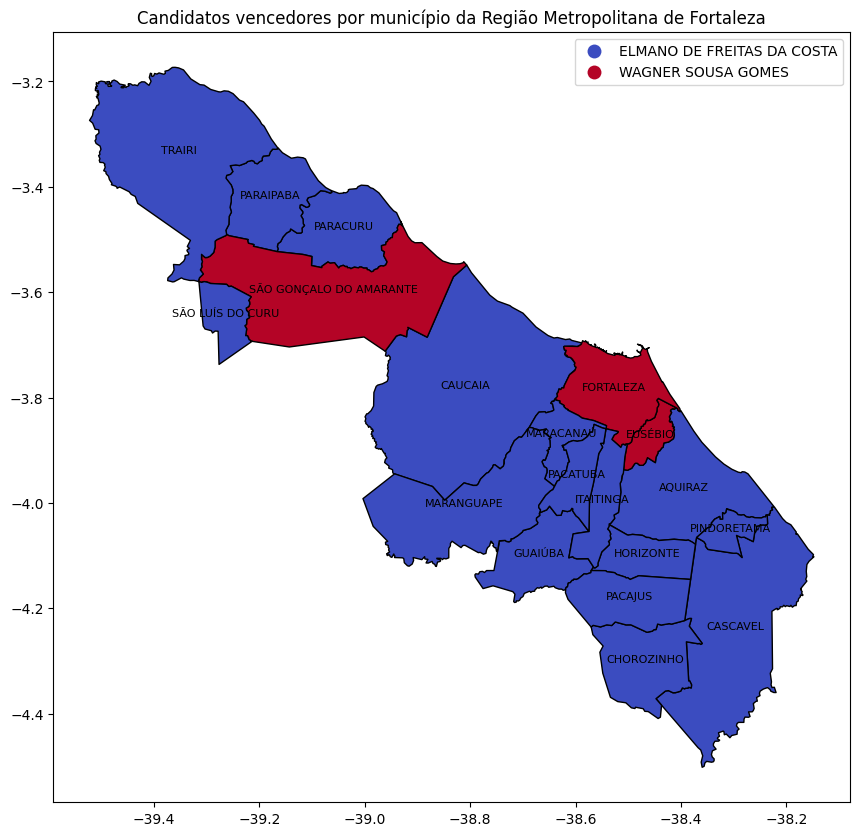

In [39]:
ax = vencedor_regiao_metropolitana.plot(
    'nm_votavel', categorical= True, legend= True, cmap= 'coolwarm', figsize= (12, 10),
    edgecolor= 'black'
)
ax.set_title('Candidatos vencedores por município da Região Metropolitana de Fortaleza')

for i, row in vencedor_regiao_metropolitana.iterrows():
    ax.annotate(text=row['nm_municipio'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize= 8)

plt.show()

Na Região Metropolitana de Fortaleza, dos 19 município apenas em 3 municípios (Fortaleza, Eusébio e São Gonçalo do Amarante) o candidato Wagner Sousa Gomes obteve maior quantidade de votos.


## 4.6 Análise com indicadores socioeconômicos do IBGE

Os dados de resumo do IBGE dos municípios cearenses são carregados:

In [40]:
dados_ibge = pd.read_csv(
    '/content/drive/MyDrive/Datasets/resumo_dados_ibge_ce.csv', encoding= 'latin-1'
)

In [41]:
dados_ibge.head()

,nome,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ACARAPE,130.002,15140,0.606,10317.47,2.28,1.75,116.46
2,ACARAÚ,842.471,63556,0.601,13261.89,16.33,1.94,75.44
3,ACOPIARA,2254.279,54687,0.595,9432.25,5.46,0.24,24.26
4,AIUABA,2438.563,17584,0.569,8642.90,2.07,0.08,7.21


Determina-se, também, a quantidade de votos para cada candidato em cada município cearense na célula abaixo. Além disso, unem-se os dois *dataframes*.

In [42]:
# Quantidade de votos por candidato em cada município cearense:

votos_por_municipio = votacao_ce.query('ds_cargo == "GOVERNADOR"').groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# 'Merge' dos dados de ambos dataframes, de votos dos candidatos e resumo dos dados do IBGE:

votos_por_municipio = pd.merge(
    left= votos_por_municipio, right= dados_ibge, how= 'inner',
    left_on= 'nm_municipio', right_on= 'nome'
)

# Elimina-se a coluna 'nome', pois possui dados redundantes:

votos_por_municipio = votos_por_municipio.drop('nome', axis= 1)

Por fim os dados são mostrados:

In [43]:
votos_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,ELMANO DE FREITAS DA COSTA,4182,180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ABAIARA,FRANCISCO RAIMUNDO MALTA DE ARAÚJO,7,180.833,11965,0.628,9158.04,3.19,1.76,66.17
2,ABAIARA,JOSÉ BATISTA NETO,1,180.833,11965,0.628,9158.04,3.19,1.76,66.17
3,ABAIARA,ROBERTO CLÁUDIO RODRIGUES BEZERRA,353,180.833,11965,0.628,9158.04,3.19,1.76,66.17
4,ABAIARA,SERLEY DE SOUSA LEAL,3,180.833,11965,0.628,9158.04,3.19,1.76,66.17


Visto que o candidato eleito Elmano de Freitas saiu como o mais votado em quase todos os municípios cearenses, não faz sentido comparar o mapa com os candidatos vencedores por município do Ceará. Portanto, as análises serão feitas comparando o mapa com o percentual de votos do candidato com os indicadores socioeconômicos do IBGE.

In [44]:
# Cálculo da porcentagem de votos que cada candidato,  para isso define-se a função:

def porcentagem_votos(dataframe: pd.DataFrame, dictionary: dict):

  percentual_de_votos = list()

  for index, row in dataframe.iterrows(): # itera-se o dataframe para obter cada linha dele.
    porcentagem = round((row['qt_votos']/dictionary[row['nm_municipio']]) * 100, 2) # os votos são divididos pelo total de votos por município.
    percentual_de_votos.append(porcentagem) # o valor calculado é adicionado a lista.

  return percentual_de_votos

In [45]:
# Os votos no candidato eleito Elamno de Freitas por município cearense são obtidos:

votos_elmano_por_municipio = governador.query('nm_votavel == "ELMANO DE FREITAS DA COSTA"')\
                                    .groupby('nm_municipio')['qt_votos'].sum().reset_index()

votos_elmano_por_municipio.head()

,nm_municipio,qt_votos
0,ABAIARA,4182
1,ACARAPE,4652
2,ACARAÚ,20534
3,ACOPIARA,18015
4,AIUABA,4052


In [46]:
# Somam-se os votos totais para cada município cearense:

votos_totais_por_municipio = governador.groupby('nm_municipio')['qt_votos'].sum()
votos_totais_por_municipio = dict(votos_totais_por_municipio) # dicionário com o nº de votos por município, cada nome do município é uma chave.

In [47]:
# A porcentagem de votos no candidato eleito Camilo Santana por município é, então, calculada:

porcentagens_elmano = porcentagem_votos(votos_elmano_por_municipio, votos_totais_por_municipio)

# E os valores são inseridos no dataframe com a criação de uma nova coluna:

votos_elmano_por_municipio['porcentagem_votos'] = porcentagens_elmano
votos_elmano_por_municipio.head()

,nm_municipio,qt_votos,porcentagem_votos
0,ABAIARA,4182,70.67
1,ACARAPE,4652,46.40
2,ACARAÚ,20534,55.91
3,ACOPIARA,18015,58.17
4,AIUABA,4052,46.78


Os dados geoespaciais devem ser adiocionados aos *dataframes* `votos_elmano_por_municipio` e `dados_ibge` para a visualização nos mapas. Portanto:

In [48]:
dados_ibge.head()

,nome,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ACARAPE,130.002,15140,0.606,10317.47,2.28,1.75,116.46
2,ACARAÚ,842.471,63556,0.601,13261.89,16.33,1.94,75.44
3,ACOPIARA,2254.279,54687,0.595,9432.25,5.46,0.24,24.26
4,AIUABA,2438.563,17584,0.569,8642.90,2.07,0.08,7.21


In [49]:
# É feito o merge dos dados geoespaciais dos municípios com os indicadores do IBGE:

dados_ibge = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= dados_ibge,
    how= 'left', left_on= 'name_muni', right_on= 'nome'
)
dados_ibge = dados_ibge.drop('nome', axis= 1) # a coluna nome é retirada, pois é redundante.

# É feito o merge dos dados geoespaciais dos municípios com os dados dos votos no candidato eleito Camilo Santana:

votos_elmano_por_municipio = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= votos_elmano_por_municipio,
    how= 'left', left_on= 'name_muni', right_on= 'nm_municipio'
)
votos_elmano_por_municipio = votos_elmano_por_municipio.drop('nm_municipio', axis= 1) # a coluna nm_municipio é retirada, pois é redundante.

### 4.6.1 Densidade populacional

O conjunto de dados na coluna `densidade_populacional` é bastante discrepante. O município de Fortaleza concentra mais de 2,5 milhões de habitantes em território modesto, se comparado a outros municípios cearenses. Portanto, aplica-se transformação logarítimica em ambos os mapas para homogeneizar e visualizar melhor os dados:

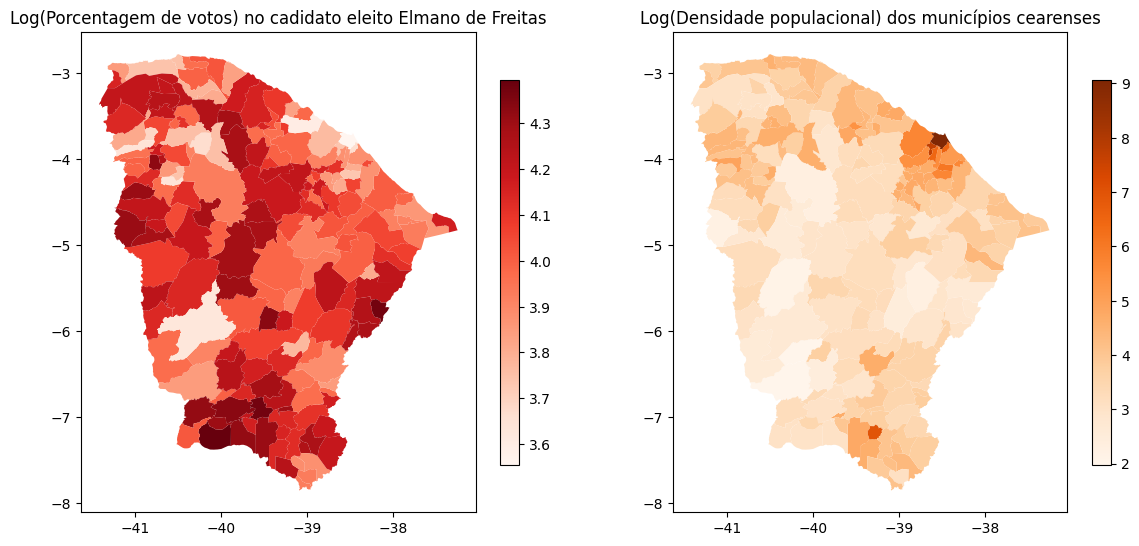

In [51]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_elmano_por_municipio.plot(np.log(votos_elmano_por_municipio['porcentagem_votos']), legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Log(Porcentagem de votos) no cadidato eleito Elmano de Freitas')
ax2 = dados_ibge.plot(np.log(dados_ibge['densidade_populacional']), cmap= 'Oranges', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(Densidade populacional) dos municípios cearenses')
plt.show()

### 4.6.2 Indíce de desenvolvimento humano

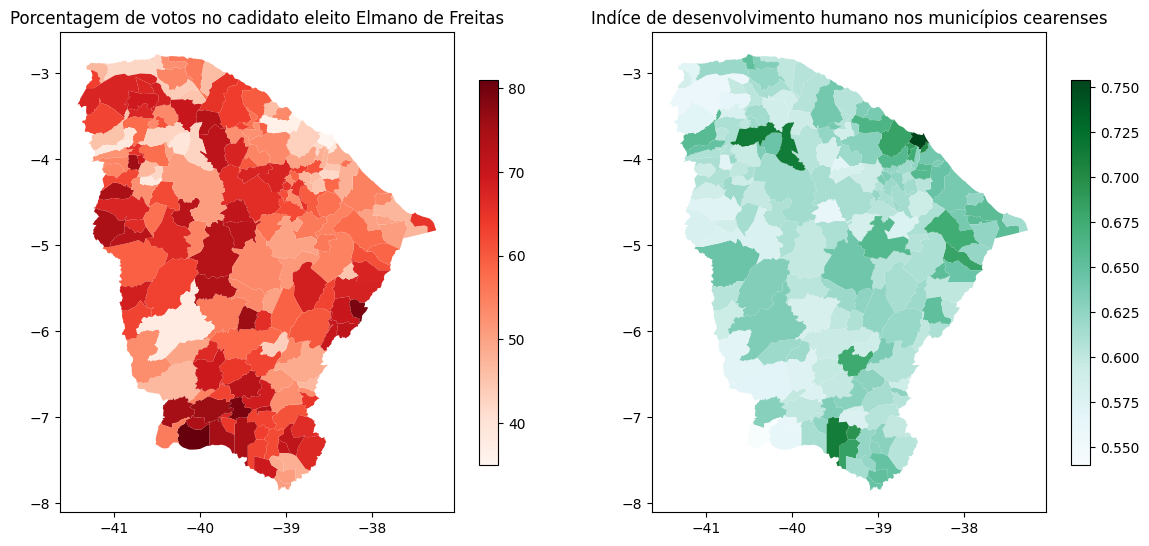

In [52]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_elmano_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos no cadidato eleito Elmano de Freitas')
ax2 = dados_ibge.plot('idhm', cmap= 'BuGn', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Indíce de desenvolvimento humano nos municípios cearenses')
plt.show()

### 4.6.3 PIB *per capita*

Municípios como Fortaleza, Eusébio e São Gonçalo do Amarante possuem PIB *per capita* discrepantes em relação às outras cidades cearenses. Portanto, utiliza-se a transformação logarítimica em ambos os mapas a fim de melhorar a visualização dos dados. 

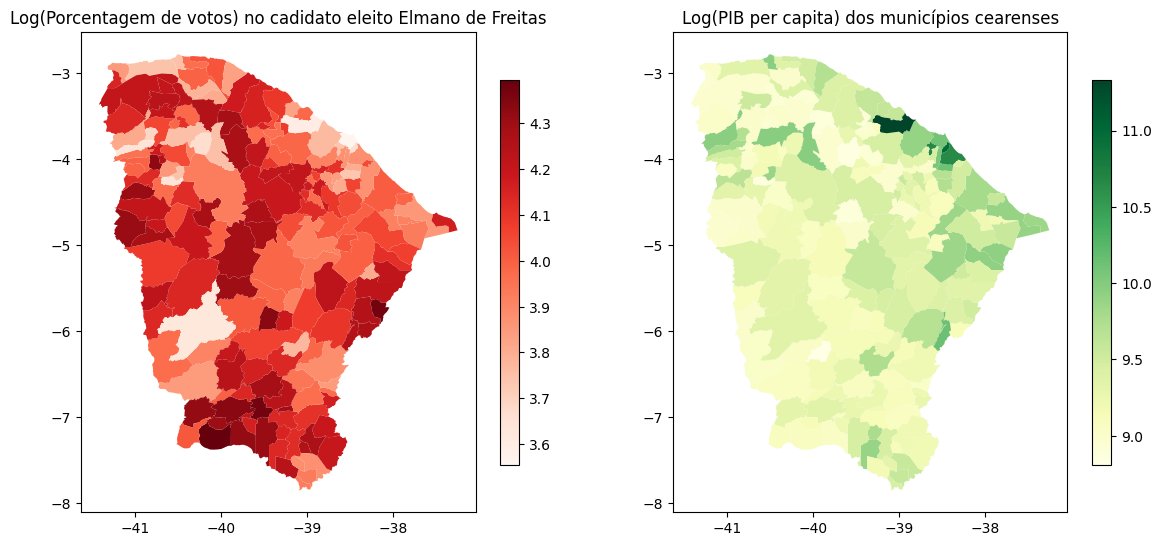

In [56]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_elmano_por_municipio.plot(np.log(votos_elmano_por_municipio['porcentagem_votos']), legend= True, 
                                      cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Log(Porcentagem de votos) no cadidato eleito Elmano de Freitas')
ax2 = dados_ibge.plot(np.log(dados_ibge['pib_per_capita']), cmap= 'YlGn', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(PIB per capita) dos municípios cearenses')
plt.show()

### 4.6.4 Área urbanizada

Fortaleza apresenta mais de 80% do território urbanizado, taxa de urbanização bem maior que qualquer cidade cearense. Portanto, utiliza-se a transformação logaritimíca em ambos os mapas também para melhorar a visualização dos dados.

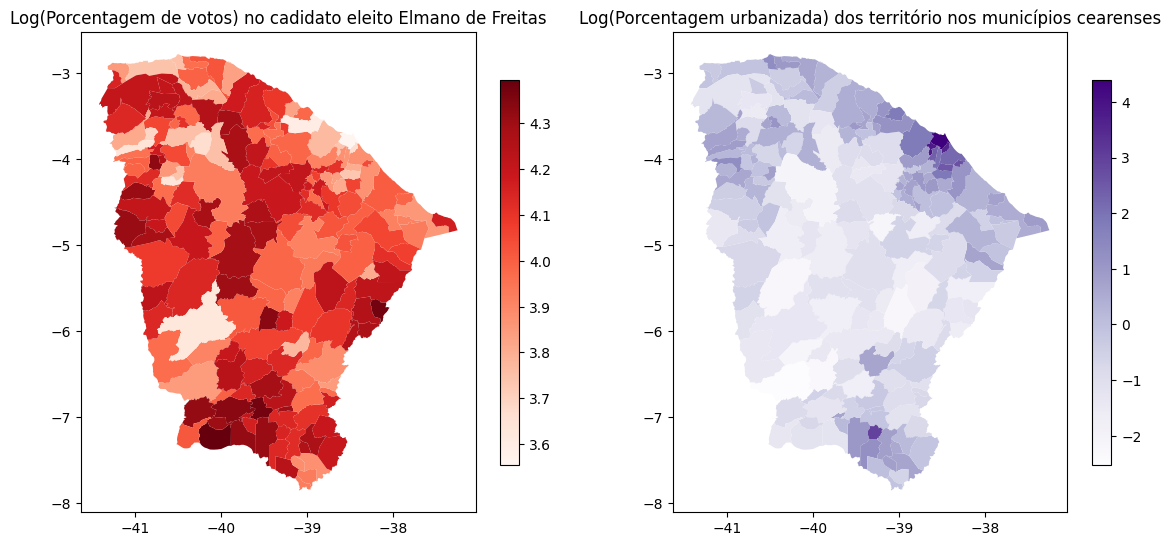

In [55]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_elmano_por_municipio.plot(np.log(votos_elmano_por_municipio['porcentagem_votos']), legend= True, 
                                      cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Log(Porcentagem de votos) no cadidato eleito Elmano de Freitas')
ax2 = dados_ibge.plot(np.log(dados_ibge['porcentagem_urbana']), cmap= 'Purples', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(Porcentagem urbanizada) dos território nos municípios cearenses')
plt.show()

## 4.7 Análise por intervalo dos indicadores socioeconômicos

Três funções são criadas a fim de realizar a análise por intervalos dos indicadores socioeconômicos.

In [59]:
def intervalos_ibge(dataframe: pd.DataFrame, nome_coluna: str, nova_coluna: str, bins: list, labels: list):
  """""
  A função 'intervalos_ibge' adiciona ao dataframe com os votos dos candidatos por município uma nova coluna. Tal coluna passa a conter um intervalo 
  pré-determinado determinado indicador do IBGE relacionado ao município em questão.

  * dataframe: dataframe contendo os votos por candidato em cada município.
  * nome_coluna: coluna com a informação que será utilizada para gerar o intervalo.
  * nova_coluna: nome da nova coluna contendo os intervalos dos indicadores do IBGE.
  * bins: lista com os valores que serão usados para formar os intervalos dos indicadores.
  * labels: lista com as labels dos intervalos.
  """""
  dataframe[nova_coluna] = pd.cut(
      dataframe[nome_coluna], bins= bins, labels= labels,
      include_lowest= True, right= False # o valor mais baixo é incluso, enquanto o valor maior não é incluso.
  )

  return dataframe # retorna o dataframe, agora contendo a coluna com os intervalos dos indicadores do IBGE.

def dict_votos_totais(dataframe: pd.DataFrame, coluna_indicador: str):
  """""
  A função dict_votos_totais retorna um dicionário com a quantidade de votos gerais para cada intervalo dos indicadores do IBGE.

  * dataframe: contendo os votos por candidato em cada município, além da coluna com os intervalos dos indicadores.
  * coluna_indicador: nome da coluna contendo os intervalos dos indicadores.
  """""
  valores_totais = dataframe.groupby(coluna_indicador)['qt_votos'].sum()
  valores_totais = dict(valores_totais)
  
  return valores_totais

def dataframe_com_porcentagens(dataframe: pd.DataFrame, dictionary: dict, coluna_indicador: str):
  """""
  A função dataframe_com_porcentagens retorna um dataframe contendo a porcentagem de votos para cada candidato referente a cada intervalo de indicador.
  * dataframe: dataframe com votos dos candidatos por municípios.
  * dictionary: dicionário contendo os votos totais de cada intervalo de indicador do IBGE.
  * coluna_indicador: coluna com o indicador do IBGE que se deseja calcular os valores de porcentagem.
  """""

  # O dataframe é agrupado pela coluna com os indicadores e nome dos candidatos, os votos são somados e ordenados:

  dataframe_intervalos_ibge = dataframe.groupby([coluna_indicador, 'nm_votavel'])['qt_votos'].sum()\
                                       .reset_index().sort_values([coluna_indicador, 'qt_votos'], ascending= [True, False])

  # A porcentagem para cada candidado em cada intervalo do indicador é calculada:

  porcentagem = list()

  for index, row in dataframe_intervalos_ibge.iterrows():
    valor = round((row['qt_votos']/dictionary[row[coluna_indicador]]) * 100, 2)
    porcentagem.append(valor)
  
  # E depois uma nova coluna é adicionada ao dataframe que é retornado:

  dataframe_intervalos_ibge['porcentagem_' + coluna_indicador] = porcentagem # o nome da coluna é obtido a partir da concatenação das strings.

  return dataframe_intervalos_ibge

### 4.7.1 Intervalos populacionais

In [82]:
# Intervalos:

bins = [0, 0.55, 0.7, 0.8]

# Labels para os intervalos de IDH municipal:

labels = ['IDH baixo', 'IDH médio', 'IDH alto']

In [61]:
# Uma nova coluna com os intervalos populacionais é adicionada ao dataframe:

votos_por_municipio = intervalos_ibge(
    dataframe= votos_por_municipio, 
    nome_coluna= 'populacao', 
    nova_coluna= 'populacao_intervalos',
    bins= bins, labels= labels
)

votos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos
0,ABAIARA,ELMANO DE FREITAS DA COSTA,4182,180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes
1,ABAIARA,FRANCISCO RAIMUNDO MALTA DE ARAÚJO,7,180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes


In [62]:
# Os votos totais para cada intervalo populacional são mostrados no dicionário:

votos_totais_por_intervalo_populacional = dict_votos_totais(votos_por_municipio, 'populacao_intervalos')
votos_totais_por_intervalo_populacional

{'Menos de 100 mil habitantes': 3146126,
 '100 mil e menos de 500 mil habitantes': 917622,
 '500 mil habitantes ou mais': 1559702}

In [63]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_populacionais = dataframe_com_porcentagens(
    votos_por_municipio, votos_totais_por_intervalo_populacional, 'populacao_intervalos'    
)
votos_intervalos_populacionais.head()

,populacao_intervalos,nm_votavel,qt_votos,porcentagem_populacao_intervalos
0,Menos de 100 mil habitantes,ELMANO DE FREITAS DA COSTA,1780609,56.60
7,Menos de 100 mil habitantes,WAGNER SOUSA GOMES,766806,24.37
3,Menos de 100 mil habitantes,ROBERTO CLÁUDIO RODRIGUES BEZERRA,356644,11.34
6,Menos de 100 mil habitantes,VOTO NULO,139194,4.42
5,Menos de 100 mil habitantes,VOTO BRANCO,100497,3.19


In [64]:
fig = px.bar(
    data_frame= votos_intervalos_populacionais,
    y= 'populacao_intervalos',
    x= 'porcentagem_populacao_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo populacional dos municípios cearenses'
)
fig.update_layout(
    yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

* O candidato Elmano de Freitas recebeu 56,6% dos votos dos municípios com menos de 100 mil habitantes. 

* Enquanto o candidato Wagner Sousa Gomes apresentou melhor desempenho em cidades com mais habitantes. Ultrapassando o candidato Elmano em cidades com mais de 500 mil habitantes (no caso, Fortaleza, onde foi vencedor).

* Os votos foram mais expressivos para o candidato Roberto Claúdio em cidades maiores (Fortaleza), vale ressaltar que o candidato foi prefeito da capital cearense.

### 4.7.2 Intervalos de indíce de desenvolvimento humano

In [65]:
# Intervalos:

bins = [0, 0.55, 0.7, 0.8]

# Labels para os intervalos de IDH municipal:

labels = ['IDH baixo', 'IDH médio', 'IDH alto']

In [66]:
# Uma nova coluna com os intervalos de IDHM é adicionada ao dataframe:

votos_por_municipio = intervalos_ibge(
    dataframe= votos_por_municipio,
    nome_coluna= 'idhm',
    nova_coluna= 'idhm_intervalos',
    bins= bins, labels= labels
)

votos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos
0,ABAIARA,ELMANO DE FREITAS DA COSTA,4182,180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio
1,ABAIARA,FRANCISCO RAIMUNDO MALTA DE ARAÚJO,7,180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio


In [67]:
# Os votos totais para cada intervalo de IDHM são mostrados no dicionário:

votos_totais_por_intervalo_idhm = dict_votos_totais(votos_por_municipio, 'idhm_intervalos')
votos_totais_por_intervalo_idhm

{'IDH baixo': 11019, 'IDH médio': 3804659, 'IDH alto': 1807772}

In [70]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_idhm = dataframe_com_porcentagens(
    dataframe= votos_por_municipio, dictionary= votos_totais_por_intervalo_idhm,
    coluna_indicador= 'idhm_intervalos'
)
votos_intervalos_idhm.head()

,idhm_intervalos,nm_votavel,qt_votos,porcentagem_idhm_intervalos
0,IDH baixo,ELMANO DE FREITAS DA COSTA,6103,55.39
3,IDH baixo,ROBERTO CLÁUDIO RODRIGUES BEZERRA,3089,28.03
7,IDH baixo,WAGNER SOUSA GOMES,1226,11.13
6,IDH baixo,VOTO NULO,385,3.49
5,IDH baixo,VOTO BRANCO,209,1.90


In [71]:
fig = px.bar(
    data_frame= votos_intervalos_idhm,
    y= 'idhm_intervalos',
    x= 'porcentagem_idhm_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo de IDH municipal dos municípios cearenses'
)
fig.update_layout(
    xaxis_title= '', yaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos', 
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

* O intervalo IDH baixo é referente unicamente ao município de Salitre, o que pode ser visto abaixo:

In [83]:
votos_por_municipio.query('idhm_intervalos == "IDH baixo"')['nm_municipio'].unique()

array(['SALITRE'], dtype=object)

* O candidato Roberto Cláudio teve desempenho considerável em relação ao candidato Wagner Sousa em Salitre (município com IDH baixo). Enquanto o seu desempenho nos municípios com IDH médio, que formam a maioria, foi inferior. Em cidades com IDH mais alto teve uma retomada no desempenho.

* O candidato Elmano de Freitas manteve o desempenho entre os intervalos de IDH baixo e médio. Porém, perdeu força nos municípios com IDH mais elevado.

* Wagner Sousa teve desempenho melhor entre os municípios com o IDH médio e alto. O resultado do candidato nos municípios com maior IDH foi equivalente ao candidato Elmano de Freitas. 

### 4.7.3 Intervalos de PIB *per capita*

In [84]:
# Intervalos:

bins = [0, 10000, 20000, 90000]

# Labels para os intervalos de PIB per capita:

labels = ['Menos de R$ 10000', 'Entre R$ 10000 - 19999,99', 'R$ 20000 ou mais']

In [73]:
# Uma nova coluna com os intervalos de PIB per capita é adicionada ao dataframe:

votos_por_municipio = intervalos_ibge(
    dataframe= votos_por_municipio, nome_coluna= 'pib_per_capita',
    nova_coluna= 'pib_intervalos', bins= bins, labels= labels
)
votos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos,pib_intervalos
0,ABAIARA,ELMANO DE FREITAS DA COSTA,4182,180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000
1,ABAIARA,FRANCISCO RAIMUNDO MALTA DE ARAÚJO,7,180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000


In [74]:
# Os votos totais para cada intervalo de PIB per capita são mostrados no dicionário:

votos_totais_por_intervalo_pib = dict_votos_totais(votos_por_municipio, 'pib_intervalos')
votos_totais_por_intervalo_pib

{'Menos de R$ 10000': 1131888,
 'Entre R$ 10000 - 19999,99': 2321911,
 'R$ 20000 ou mais': 2169651}

In [75]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_pib = dataframe_com_porcentagens(
    votos_por_municipio, dictionary= votos_totais_por_intervalo_pib,
    coluna_indicador= 'pib_intervalos'
)
votos_intervalos_pib.head()

,pib_intervalos,nm_votavel,qt_votos,porcentagem_pib_intervalos
0,Menos de R$ 10000,ELMANO DE FREITAS DA COSTA,695973,61.49
7,Menos de R$ 10000,WAGNER SOUSA GOMES,230315,20.35
3,Menos de R$ 10000,ROBERTO CLÁUDIO RODRIGUES BEZERRA,123559,10.92
6,Menos de R$ 10000,VOTO NULO,48056,4.25
5,Menos de R$ 10000,VOTO BRANCO,33166,2.93


In [85]:
fig = px.bar(
    data_frame= votos_intervalos_pib,
    y= 'pib_intervalos',
    x= 'porcentagem_pib_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem dos votos por candidato para cada intervalo de PIB per capita'
)
fig.update_layout(
    title= dict(x= 0.5), yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed')
)
fig.show()

* VOTO BRANCO, VOTO NULO e a porcentagem de votos em Roberto Cláudio pouco variam entre os municípios com menor PIB *per capita* e PIB *per capita* mediano. No entanto, o candidato Robertou Cláudio teve desempenho eleitoral mais destacável nos municípios com maior PIB *per capita*.
* O desempenho eleitoral do candidato Wagner Gomes cresceu nos municípios com  PIB *per capita* medianos e foi maior no grupo dos municípios com maior PIB *per capita*.
* Com o candidato eleito Elmano de Freitas houve o movimento contrário, diminuição da porcentagem de votos no grupo dos municípios com PIB *per capita* mediano e pior desempenho nos municípios com maior PIB *per capita*.

### 4.7.4 Intervalos de território urbanizado

In [77]:
# Intervalos:

bins= [0, 10, 40, 90]

# Labels para os intervalos de território urbanizado:

labels= ['Menos de 10%', 'Entre 10 - 39,99%', '40% ou mais']

In [78]:
# Uma nova coluna com os intervalos de território urbanizado é adicionada ao dataframe:

votos_por_municipio = intervalos_ibge(
    votos_por_municipio, nome_coluna= 'porcentagem_urbana', 
    nova_coluna= 'taxa_urbanizacao_intervalos',
    bins= bins, labels= labels
)
votos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos,pib_intervalos,taxa_urbanizacao_intervalos
0,ABAIARA,ELMANO DE FREITAS DA COSTA,4182,180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000,Menos de 10%
1,ABAIARA,FRANCISCO RAIMUNDO MALTA DE ARAÚJO,7,180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000,Menos de 10%


In [79]:
# Os votos totais para cada intervalo de território urbanizado são mostrados no dicionário:

votos_totais_por_intervalo_urbanizacao = dict_votos_totais(votos_por_municipio, 'taxa_urbanizacao_intervalos')
votos_totais_por_intervalo_urbanizacao

{'Menos de 10%': 3608699, 'Entre 10 - 39,99%': 306413, '40% ou mais': 1708338}

In [80]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_urbanizacao = dataframe_com_porcentagens(
    votos_por_municipio, dictionary= votos_totais_por_intervalo_urbanizacao,
    coluna_indicador= 'taxa_urbanizacao_intervalos'
)
votos_intervalos_urbanizacao.head()

,taxa_urbanizacao_intervalos,nm_votavel,qt_votos,porcentagem_taxa_urbanizacao_intervalos
0,Menos de 10%,ELMANO DE FREITAS DA COSTA,2033247,56.34
7,Menos de 10%,WAGNER SOUSA GOMES,890869,24.69
3,Menos de 10%,ROBERTO CLÁUDIO RODRIGUES BEZERRA,404290,11.20
6,Menos de 10%,VOTO NULO,159683,4.42
5,Menos de 10%,VOTO BRANCO,117714,3.26


In [81]:
fig = px.bar(
    data_frame= votos_intervalos_urbanizacao,
    y= 'taxa_urbanizacao_intervalos',
    x= 'porcentagem_taxa_urbanizacao_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem dos votos por candidato para cada intervalo de urbanização dos municípios'
)
fig.update_layout(
    yaxis= dict(autorange= 'reversed'), yaxis_title= '', 
    xaxis_title= 'Porcentagem dos votos', title= dict(x= 0.5),
    legend_title= 'Candidatos'
)
fig.show()

* O candidato Roberto Cláudio teve melhor desempenho eleitoral nos municípios com 40% ou mais de área urbanizada. Mais uma vez é importante lembrar que ele foi prefeito da capital cearense.

* O candidato Elmano de Freitas teve desempenho eleitoral próximo entre os municípios os intervalos menores que 40% de área urbanizada. Em municípios mais urbanizados o candidato Wagner Sousa ultrapassou Elmano de Freitas.